In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import colorConverter as cc
import numpy as np
import pandas as pd
# from scipy.interpolate import make_interp_spline
from matplotlib import ticker
import seaborn as sns

In [10]:
input_folder = "G:\\weather extreme\\Revision\\stats_data\\"

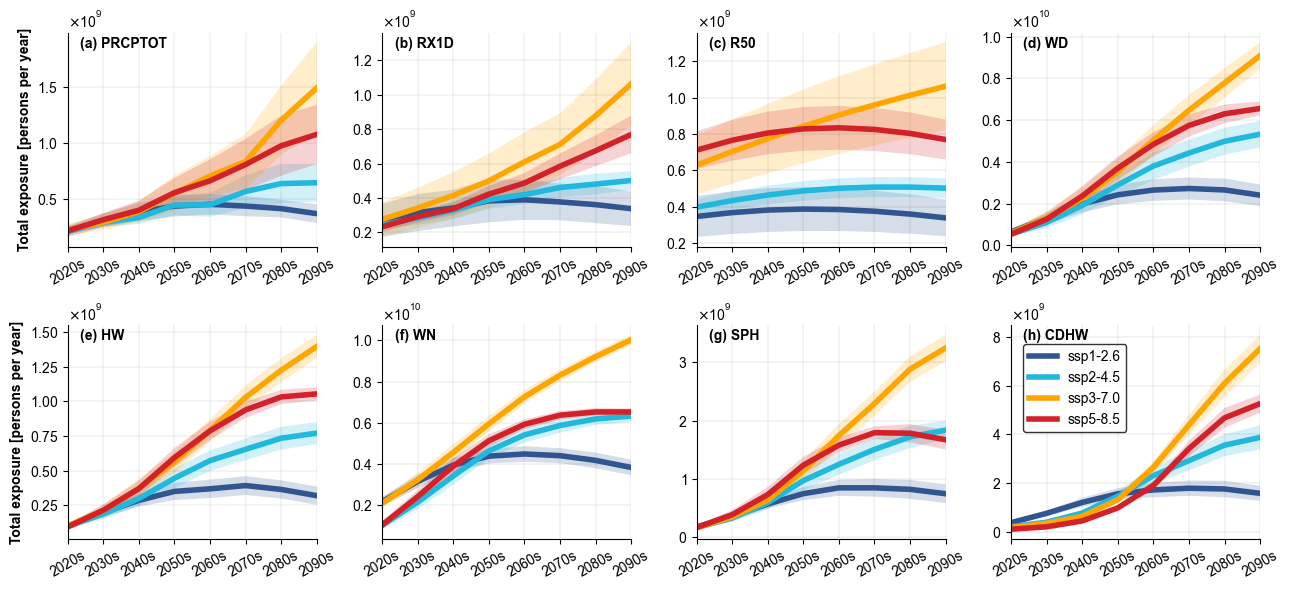

In [11]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.use_mathtext"]=True
# plt.rcParams['xtick.direction'] = 'in'
fig = plt.figure(figsize=(13, 6))
ax1 = fig.add_subplot(241)


time2=np.arange(2020,2100,10)

k=1
indices = ["PRCPTOT", "RX1D", "R50", "WD", "HW", "WN", "SPH", "CDHW"]
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]
for k in range(1, 9):
    table = pd.read_csv(input_folder + f"{indices[k-1]}.csv")
    ax = plt.subplot(2,4,k)
        
    #ssp126
    ax.fill_between(time2, table["ssp126_low"], table["ssp126_high"], alpha=0.2, color='#305590', edgecolor=None)
    ax.plot(time2, table["ssp126_mean"], color='#305590',linewidth='4',label='ssp1-2.6') 
    #ssp245
    ax.fill_between(time2, table["ssp245_low"], table["ssp245_high"], alpha=0.2, color='#21B8DD', edgecolor=None)
    ax.plot(time2, table["ssp245_mean"], color='#21B8DD',linewidth='4',label='ssp2-4.5') 
    #ssp370
    ax.fill_between(time2, table["ssp370_low"], table["ssp370_high"], alpha=0.2, color='orange', edgecolor=None)
    ax.plot(time2, table["ssp370_mean"], color='orange',linewidth='4',label='ssp3-7.0') 
    #ssp585
    ax.fill_between(time2, table["ssp585_low"], table["ssp585_high"], alpha=0.2, color='#D22128', edgecolor=None)
    ax.plot(time2, table["ssp585_mean"], color='#D22128',linewidth='4',label='ssp5-8.5') 
    #plt.ylim(0,plt.ylim()[1])
    plt.xlim(2020,2090)
    plt.tick_params(labelsize=10)
    group_labels = ["2020s", "2030s", "2040s", "2050s", "2060s", "2070s", "2080s", "2090s"]
    ax.set_xticks(time2, group_labels, rotation=30)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useLocale=False)  
    '''
    y=ax.yaxis.get_ticklabels()
    new_y=[]
    for ind in range(len(y)):
        y1 = re.split('\{', y[ind]._text)
        y2=re.split('\}', y[ind]._text)
        number=float(re.split('\}', y1[1])[0])
        new_y.append(y1[0]+'{'+str(round(number,1))+'}'+y2[1])
        #new_y.append(round(number,1))
    ax.set_yticks(new_y)
    '''          
    if k==8:
        #plt.ylabel('Exposed length (km)',{'family':'Cambria','weight':'bold','size' : 20})#(J/${m^2}$)
        plt.legend(fontsize=10, loc=[0.05, 0.5], edgecolor='k')
    elif k==1 or k==5:
        plt.ylabel('Total exposure [persons per year]',{'family':'Arial','weight':'bold','size' : 10})#(J/${m^2}$)
    else:
        plt.ylabel('',{'family':'Arial','weight':'bold','size' : 15})#(J/${m^2}$)

    plt.grid( color = 'k',linestyle='-',linewidth = 0.07)
    ax.text(
        0.05, 0.93, f"{labels[k-1]} {indices[k-1]}",
        fontsize=10,
        fontweight="bold",
        transform = ax.transAxes
    )
#ax.text(2080,ax.get_ylim()[1]*0.8/(ax.get_ylim()[1]-ax.get_ylim()[0]),label[i],size=15)  
sns.despine()


plt.tight_layout()
plt.savefig("G:\weather extreme\mapping_result\pop_exposure_sing_stat_revised.jpg", dpi=300)